<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Importance</a></span><ul class="toc-item"><li><span><a href="#Sklearn-Importance" data-toc-modified-id="Sklearn-Importance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sklearn Importance</a></span></li><li><span><a href="#Permutation-Importance" data-toc-modified-id="Permutation-Importance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Permutation Importance</a></span></li></ul></li><li><span><a href="#Mean-Target-Value-Distribution" data-toc-modified-id="Mean-Target-Value-Distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mean Target Value Distribution</a></span><ul class="toc-item"><li><span><a href="#With-Interactions" data-toc-modified-id="With-Interactions-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>With Interactions</a></span></li><li><span><a href="#pdpbox:--Target-Variable-distribution" data-toc-modified-id="pdpbox:--Target-Variable-distribution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>pdpbox:  Target Variable distribution</a></span><ul class="toc-item"><li><span><a href="#Average-target-value-across-different-feature-values" data-toc-modified-id="Average-target-value-across-different-feature-values-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Average target value across different feature values</a></span></li><li><span><a href="#Average-target-value-across-different-feature-value-combinations" data-toc-modified-id="Average-target-value-across-different-feature-value-combinations-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Average target value across different feature value combinations</a></span></li></ul></li></ul></li><li><span><a href="#Prediction-Distribution" data-toc-modified-id="Prediction-Distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prediction Distribution</a></span><ul class="toc-item"><li><span><a href="#Prediction-distribution-with-Interactions" data-toc-modified-id="Prediction-distribution-with-Interactions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prediction distribution with Interactions</a></span></li><li><span><a href="#Residuals-with-interaction" data-toc-modified-id="Residuals-with-interaction-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Residuals with interaction</a></span></li><li><span><a href="#Across-different-feature-values" data-toc-modified-id="Across-different-feature-values-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Across different feature values</a></span></li><li><span><a href="#Across-different-feature-value-combinations" data-toc-modified-id="Across-different-feature-value-combinations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Across different feature value combinations</a></span></li></ul></li><li><span><a href="#Partial-Dependence-Plot" data-toc-modified-id="Partial-Dependence-Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Partial Dependence Plot</a></span><ul class="toc-item"><li><span><a href="#One-Variable:-Linear---Bivariate-+-SLR" data-toc-modified-id="One-Variable:-Linear---Bivariate-+-SLR-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>One-Variable: Linear - Bivariate + SLR</a></span></li><li><span><a href="#One-Variable:-PDP" data-toc-modified-id="One-Variable:-PDP-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>One-Variable: PDP</a></span></li></ul></li><li><span><a href="#Shapley-Value" data-toc-modified-id="Shapley-Value-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Shapley Value</a></span><ul class="toc-item"><li><span><a href="#Individual-Prediction" data-toc-modified-id="Individual-Prediction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Individual Prediction</a></span></li><li><span><a href="#Feature-values-&amp;-Contribution" data-toc-modified-id="Feature-values-&amp;-Contribution-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Feature values &amp; Contribution</a></span></li></ul></li><li><span><a href="#Rulefit" data-toc-modified-id="Rulefit-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Rulefit</a></span></li></ul></div>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

sns.set(rc={'figure.figsize':(12,8)})

import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

from statsmodels.graphics.plot_grids import scatter_ellipse
import shap  
from sklearn.inspection import plot_partial_dependence

from pdpbox import pdp, get_dataset, info_plots

# Model fitting

In [20]:
import numpy as np
from sklearn.datasets import load_wine, load_boston, load_breast_cancer
data_sklearn = load_boston()
data = pd.DataFrame(data_sklearn.data,columns=data_sklearn.feature_names)
data = data.assign(MEDV=data_sklearn.target)
features = data_sklearn.feature_names


y = data.MEDV.values
X = data.drop(columns='MEDV').values
feature_names = list(data.drop(columns='MEDV').columns)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#model = LinearRegression().fit(train_X, train_y)
model = RandomForestRegressor(n_estimators=100, random_state=0).fit(train_X, train_y)

#model = LGBMRegressor().fit(train_X, train_y)
#model = DecisionTreeRegressor().fit(train_X, train_y)

## Augmented df wie in broom
data_aug = data.assign(PRED=model.predict(X))
data_aug = data_aug.assign(RESID=data_aug.PRED-data_aug.MEDV)


# Feature Importance

## Sklearn Importance

In [21]:
df = pd.DataFrame(
    zip(feature_names,model.feature_importances_),
    columns=['Feature','Importance']).sort_values(by='Importance',
                                                  ascending=False)

print(df.iloc[:,[1,0]])

    Importance  Feature
12    0.555572    LSTAT
5     0.216694       RM
7     0.056042      DIS
0     0.044835     CRIM
6     0.035164      AGE
4     0.032281      NOX
10    0.019824  PTRATIO
9     0.013974      TAX
11    0.013298        B
2     0.006144    INDUS
8     0.003767      RAD
1     0.001644       ZN
3     0.000763     CHAS


## Permutation Importance

In [22]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=0).fit(val_X, val_y)
#eli5.show_prediction(perm,row)
eli5.show_weights(perm, feature_names = feature_names)

Weight,Feature
0.9306 ± 0.2442,LSTAT
0.3805 ± 0.0774,RM
0.0415 ± 0.0067,CRIM
0.0392 ± 0.0139,NOX
0.0389 ± 0.0223,DIS
0.0354 ± 0.0081,PTRATIO
0.0143 ± 0.0079,TAX
0.0111 ± 0.0052,AGE
0.0081 ± 0.0057,B
0.0038 ± 0.0017,INDUS


# Mean Target Value Distribution

## With Interactions

Text(84.5, 0.5, 'RM')

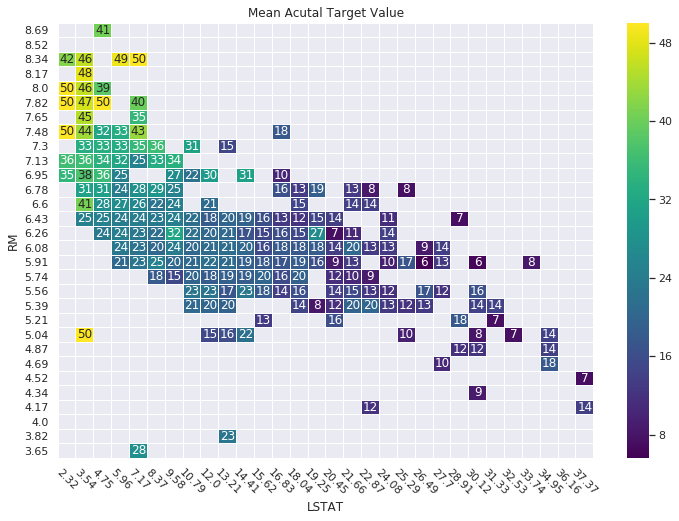

In [6]:
## KEINE KONTROLLE VON ANDEREN VARIABLEN
# => analog zu 
#    bivariater scatterplot vs partial regression plot

features_to_plot = ['LSTAT', 'RM']

plt.figure(figsize=(12,8))
cuts = 30
df = (data
      .groupby((pd.cut(data[features_to_plot[1]],cuts),    # Y - auch mit qcut
                pd.cut(data[features_to_plot[0]],cuts))       # X 
              )['MEDV']                     # Z = Ziel Variable
      .mean()                               # Statistik: count, sum, mean, median, max, min,...  
      .unstack()
      .sort_index(ascending=False))

df.index = pd.Series(df.index.values).apply(lambda x: np.round(x.mid,2))
df.columns = pd.Series(df.columns.values).apply(lambda x: np.round(x.mid,2))

sns.heatmap(df, annot=True, fmt=".0f", linewidths=.05, cmap='viridis')#plt.cm.jet)#'viridis');
plt.xticks(rotation=-45);
plt.title('Mean Acutal Target Value')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])

Text(0, 0.5, 'RM')

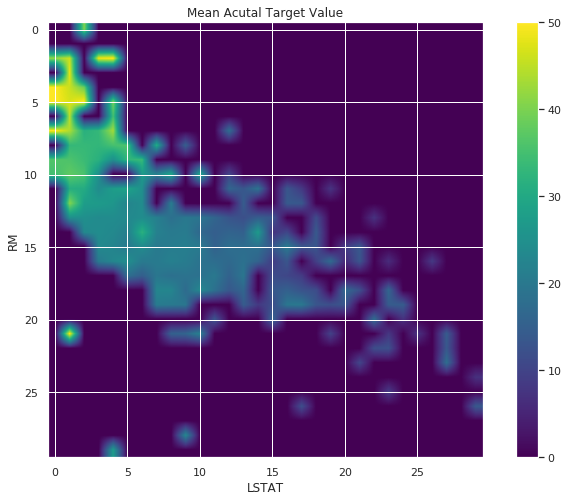

In [7]:
# TODO: axis
plt.figure(figsize=(12,8))
plt.imshow(df.fillna(0),interpolation='bilinear',cmap='viridis')
plt.colorbar()
plt.title('Mean Acutal Target Value')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])

In [8]:
# sns.kdeplot(data.RM, data.DIS) 
# zeigt nur wo die meisten Punkte liegen - keinen Zusammenhang mit Zielvariable

## pdpbox:  Target Variable distribution

### Average target value across different feature values

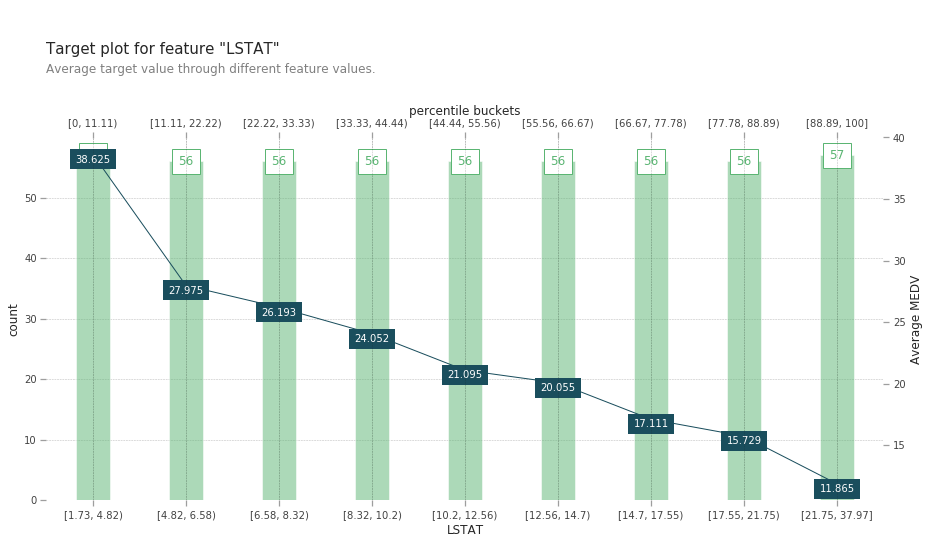

In [9]:
fig, axes, summary_df = info_plots.target_plot(
    df=data, feature='LSTAT', feature_name='LSTAT', target='MEDV', show_percentile=True)


### Average target value across different feature value combinations

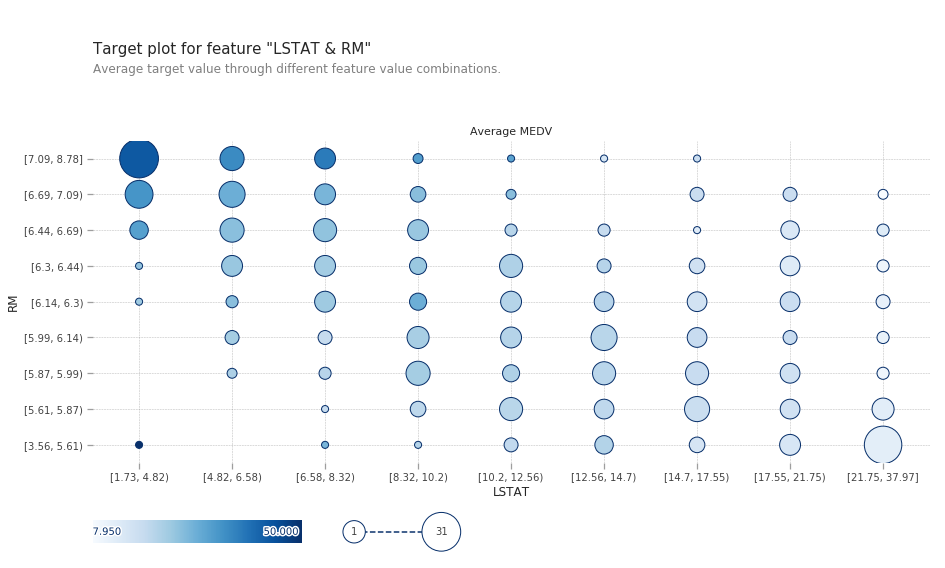

In [63]:
features_to_plot = ['LSTAT', 'RM']
fig, axes, summary_df = info_plots.target_plot_interact(
    df=data, features=features_to_plot,
    feature_names=features_to_plot, target='MEDV')

# Prediction Distribution

## Prediction distribution with Interactions

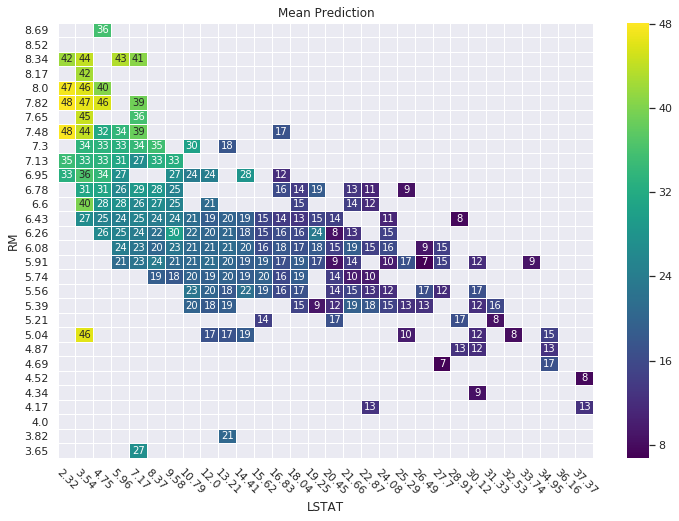

In [64]:
plt.figure(figsize=(12,8))
cuts = 30
df = (data_aug
      .groupby((pd.cut(data_aug[features_to_plot[1]],cuts),    # Y - auch mit qcut
                pd.cut(data_aug[features_to_plot[0]],cuts))       # X 
              )['PRED']                     # Z = Ziel Variable
      .mean()                               # Statistik: count, sum, mean, median, max, min,...  
      .unstack()
      .sort_index(ascending=False))

df.index = pd.Series(df.index.values).apply(lambda x: np.round(x.mid,2))
df.columns = pd.Series(df.columns.values).apply(lambda x: np.round(x.mid,2))

sns.heatmap(df, annot=True, fmt=".0f", linewidths=.05, cmap='viridis')#plt.cm.jet)#'viridis');
plt.xticks(rotation=-45);
plt.title('Mean Prediction')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1]);

## Residuals with interaction

Text(84.5, 0.5, 'RM')

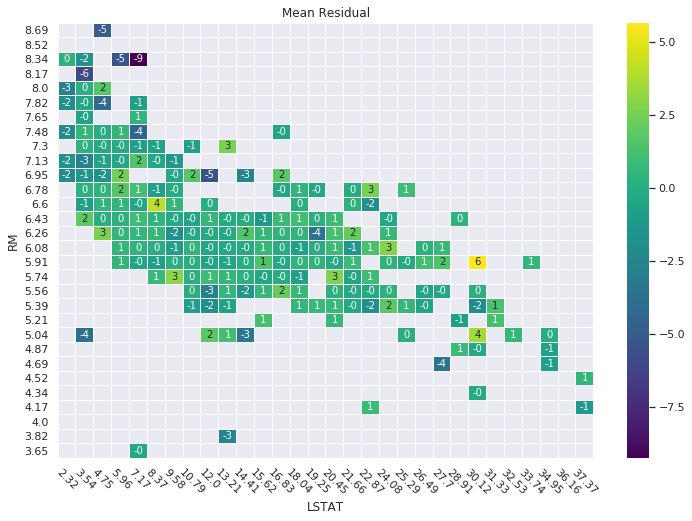

In [11]:
plt.figure(figsize=(12,8))
cuts = 30
df = (data_aug
      .groupby((pd.cut(data_aug[features_to_plot[1]],cuts),    # Y - auch mit qcut
                pd.cut(data_aug[features_to_plot[0]],cuts))    # X 
              )['RESID']                                       # Z = Ziel Variable
      .mean()                               # Statistik: count, sum, mean, median, max, min,...  
      .unstack()
      .sort_index(ascending=False))

df.index = pd.Series(df.index.values).apply(lambda x: np.round(x.mid,2))
df.columns = pd.Series(df.columns.values).apply(lambda x: np.round(x.mid,2))

sns.heatmap(df, annot=True, fmt=".0f", linewidths=.05, cmap='viridis') #plt.cm.jet)#'viridis');
plt.xticks(rotation=-45);
plt.title('Mean Residual')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])

## Across different feature values

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


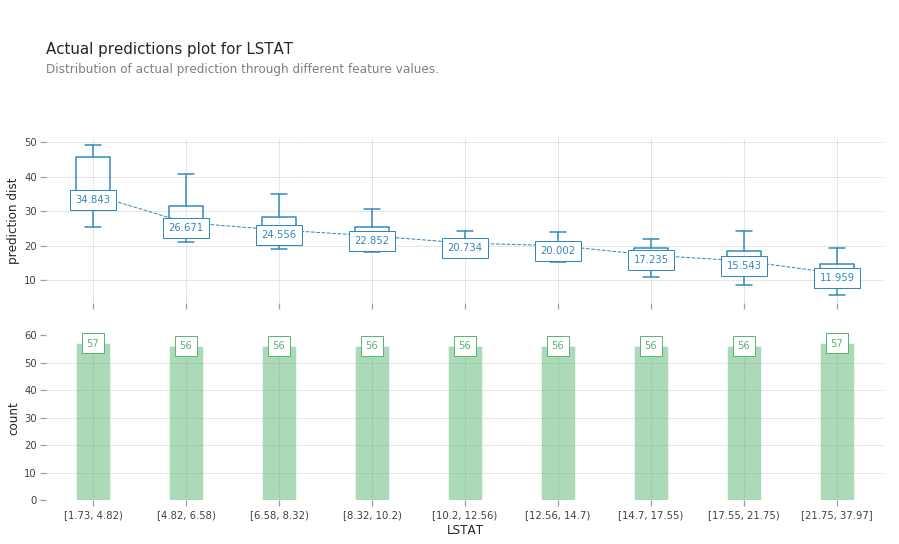

In [13]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, 
    X=data.drop('MEDV',axis=1), 
    feature='LSTAT', 
    feature_name='LSTAT',predict_kwds={})

## Across different feature value combinations

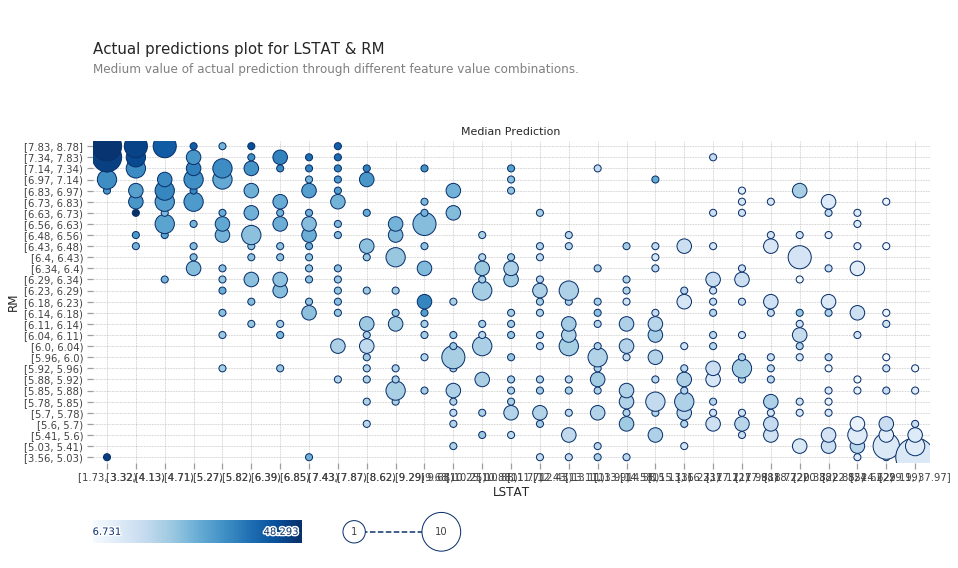

In [17]:
info_plots.actual_plot_interact(model=model, 
                                X=data.drop('MEDV',axis=1), 
                                features=features_to_plot, 
                                feature_names=features_to_plot,
                                num_grid_points=(30,30),
                                );


# Partial Dependence Plot

In [14]:
print('version is {}.'.format(pd.__version__))
#!pip install --upgrade sklearn


version is 0.25.3.


## One-Variable: Linear - Bivariate + SLR

In [15]:
#!pip install hvplot

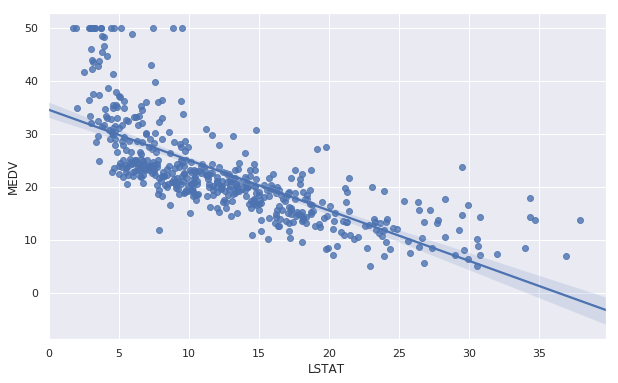

In [16]:
## Effekt durch Bivariate Plot 
# + SLR = OHNE KONTROLLE der anderen Variablen!!
plt.figure(figsize=(10,6))
sns.regplot(x='LSTAT',y='MEDV', data=data)

## One-Variable: PDP 

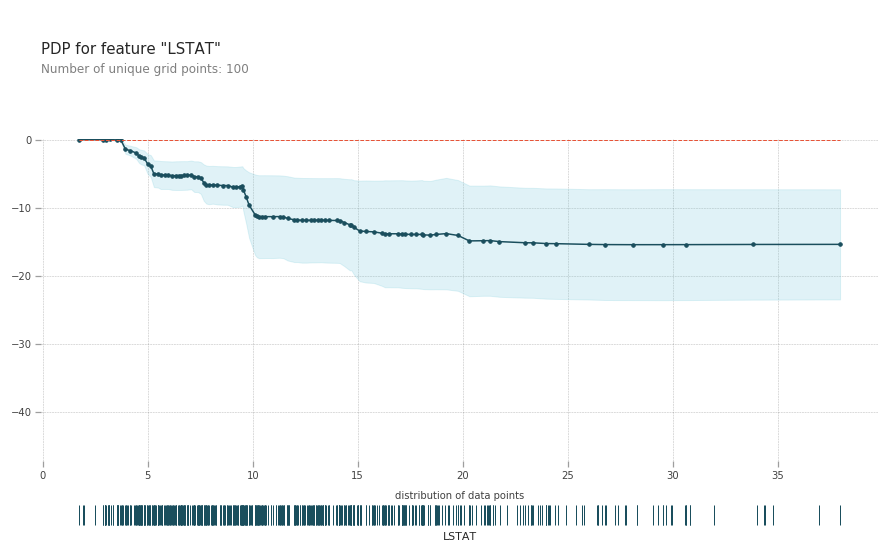

In [17]:


feature = 'LSTAT'
pdp_result = pdp.pdp_isolate(model=model,dataset=data,
                             num_grid_points=100, 
                             model_features=feature_names, 
                             feature=feature)

pdp.pdp_plot(pdp_result, feature, 
             plot_pts_dist=True, center=True, 
             plot_lines=False)
plt.show()

<Figure size 864x576 with 0 Axes>

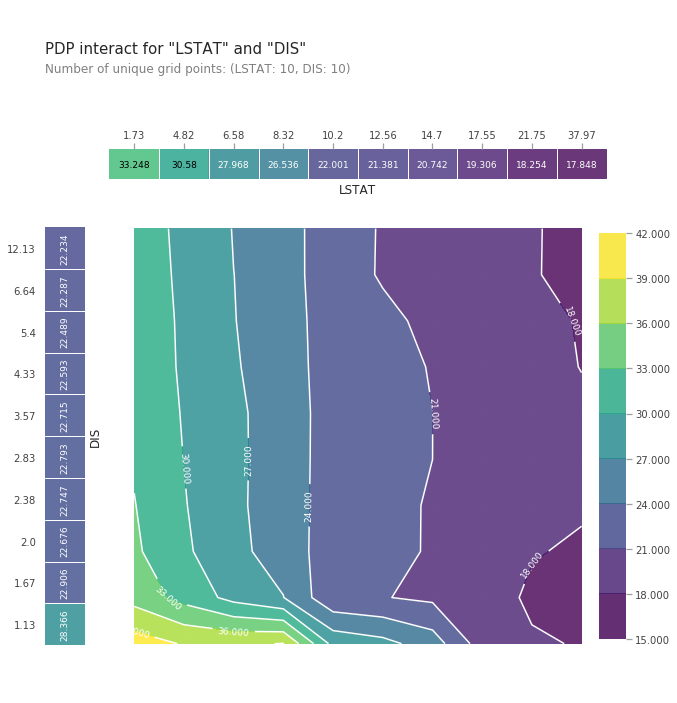

In [62]:
plt.figure(figsize=(12,8))


inter1  =  pdp.pdp_interact(model=model, dataset=data, 
                            model_features=feature_names,
                            num_grid_points=(10,10),
                            features=features_to_plot);


fig, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1, 
                      feature_names=features_to_plot, 
                      plot_type='contour',  
                      plot_pdp=True);

axes['pdp_inter_ax']['_pdp_x_ax'].grid(False)
axes['pdp_inter_ax']['_pdp_y_ax'].grid(False)


aspect_x, aspect_y = (.6, 1.07) 
update_aspect = lambda ax: (ax['_pdp_x_ax'].set_aspect(aspect_x), ax['_pdp_y_ax'].set_aspect(aspect_y))
map_aspect = np.vectorize(update_aspect)
map_aspect(axes['pdp_inter_ax']);



# Shapley Value

## Individual Prediction

In [28]:
explainer = shap.TreeExplainer(model, train_X)
#explainer = shap.LinearExplainer(model,train_X)

row = X[4:5,:]
shap_values = explainer.shap_values(row[0])
print(row)

[[6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]


In [29]:
prediction = model.predict(row)[0]
print("Prediction: {}".format(prediction))

Prediction: 33.51699999999998


In [30]:
## Baseline
# = expected value = mean value of the predictions on training set
model.predict(train_X).mean()

22.322271767810026

In [32]:
exp = explainer.expected_value
print("Baseline Value:  {} ".format(round(exp,4)))
print("Predicted Value: {} ".format(round(prediction,4)))
print("To-Explain:      {} ".format(round(prediction-exp,4)))

Baseline Value:  22.3222 
Predicted Value: 33.517 
To-Explain:      11.1948 


In [116]:
np.round(model.coef_,2)

array([-1.100e-01,  6.000e-02,  4.000e-02,  2.430e+00, -2.123e+01,
        2.880e+00,  1.000e-02, -1.470e+00,  3.100e-01, -1.000e-02,
       -1.000e+00,  1.000e-02, -5.600e-01])

In [117]:
df_print = pd.DataFrame(zip(feature_names,shap_values),
                        columns=['feature','shap_value']).sort_values('shap_value')

print(df_print)
print("\nSum shap-values: {}".format(np.round(df_print.shap_value.sum(),4)))
model

    feature  shap_value
7       DIS   -3.293059
8       RAD   -1.995262
1        ZN   -0.658201
2     INDUS   -0.346237
10  PTRATIO   -0.221043
3      CHAS   -0.198641
6       AGE   -0.100568
11        B    0.242280
0      CRIM    0.427522
9       TAX    1.955475
4       NOX    2.039878
5        RM    2.564405
12    LSTAT    4.239791

Sum shap-values: 4.6563


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, row,feature_names=feature_names)

## Feature values & Contribution

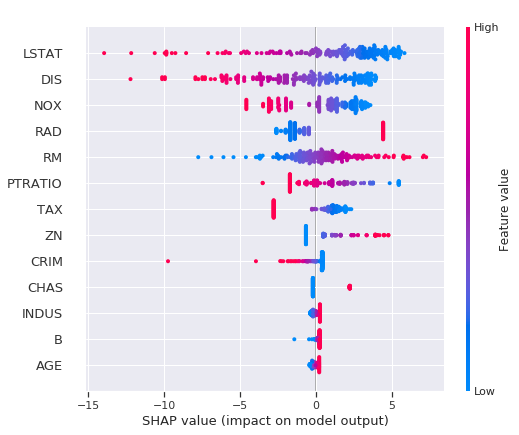

In [119]:
## Summary Plots
# vs Feature Importance: geben detailiertere Informationen

#explainer = shap.LinearExplainer(model,X)
#explainer = shap.TreeExplainer(model)

## für mehrere rows anstatt für eine prediction
examples = X[200:400,:]
shap_values = explainer.shap_values(examples)

shap.summary_plot(shap_values, 
                  examples,
                  feature_names=feature_names)

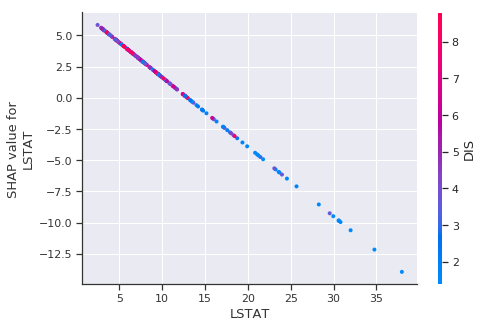

In [120]:
## SHAP Dependence Contribution Plot
# vs PDP: zeigt die Verteilung 
# Besonders zu beachten:
# 1. verschiedene shap-Werte zum gleichen Wert bei Prädikator 
#    => einer oben, einer weiter unten
# 2. gibt es Werte die nicht zum Trend passen 
#    => welchen Wert haben die in der zweiten Variable (Farbe)
#       INTERAKTION, wennn Punktfarbe auch nicht zum trend passt!

shap.dependence_plot('LSTAT', 
                     shap_values, 
                     examples, 
                     feature_names=feature_names,
                     interaction_index='DIS')


# Rulefit

In [12]:
#!pip install git+git://github.com/christophM/rulefit.git

In [13]:
# https://stats.stackexchange.com/questions/208930/difference-between-rulefit-and-random-forest
from rulefit import RuleFit

## alternativ: tree generator als Argument
#from sklearn.ensemble import GradientBoostingRegressor
#gb = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=0.01)
#rf = RuleFit(gb)

rf = RuleFit()
_ = rf.fit(X, y, feature_names=feature_names)

In [14]:
rf.predict(X)[0]

24.071259578285655

In [15]:
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

rules

,rule,type,coef,support,importance
1,ZN,linear,5.620476e-03,1.000000,1.268616e-01
11,B,linear,-1.347671e-03,1.000000,1.210821e-01
6,AGE,linear,-3.553026e-02,1.000000,9.937907e-01
1070,DIS > 1.1716500520706177 & RM <= 8.36749982833...,rule,-1.065657e+00,0.978632,1.541006e-01
673,CRIM <= 16.34310007095337 & RM <= 8.3169999122...,rule,9.069983e-02,0.935897,2.221561e-02
...,...,...,...,...,...
1685,NOX > 0.6590000092983246 & RM > 6.54200005531311,rule,-3.262328e-16,0.008547,3.003106e-17
883,LSTAT <= 12.065000057220459 & DIS <= 1.3848499...,rule,6.163011e+00,0.008547,5.673305e-01
199,PTRATIO <= 20.949999809265137 & INDUS <= 26.69...,rule,3.251298e-02,0.008547,2.992953e-03
322,TAX > 219.0 & RAD <= 2.5 & NOX > 0.49350000917...,rule,-1.091379e+00,0.008547,1.004659e-01
